In [28]:
from gradient_descent import Gradient_Descent
import numpy as np, matplotlib.pyplot as plt, os, pandas as pd


In [109]:
def logistic_gradient_f(X, y, weights):
    p1 = X.T.dot(y)
    n = y.shape[0]
    exppart = np.exp(X.dot(weights))
    p2 = - n * X.T.dot(exppart / (1 + exppart))
    
    return -(p1 + p2)


In [50]:
### let's define X of shape (n, 2) and play around a bit, to see if it's working
np.random.seed(1)
n = 1_000
X = np.concatenate((np.ones((n, 1)), np.random.randn(n).reshape((-1, 1))), axis=1)
y = np.random.binomial(n=1, p=1/2, size=n)
y[np.where(X[:, 1] > 0.5)] = 1
y=y.reshape(-1, 1)

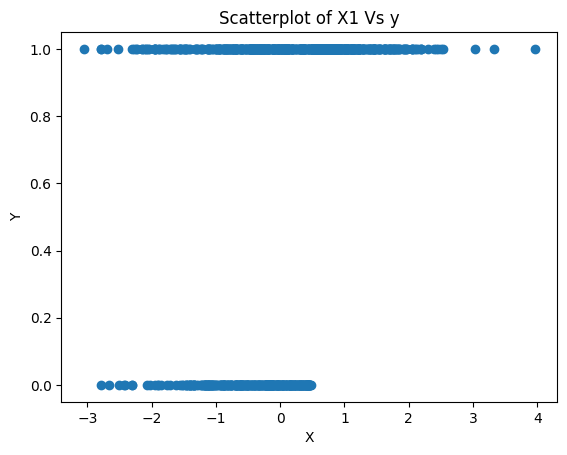

In [51]:
plt.title('Scatterplot of X1 Vs y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:, 1], y)
plt.show()

In [111]:
# init_weights = np.zeros((2, 1))
init_weights = np.array([5., 5.]).reshape(-1, 1)


w = Gradient_Descent(
    weights=init_weights,
    gradient_function=logistic_gradient_f,
)

w.fit(X, y,)

Reached convergence after 3920 steps.


array([[-7.33781604],
       [ 0.24843573]])

In [112]:
ypred = X.dot(w.weights) # logits
ypred_probs = 1 / (1 + np.exp(-ypred))

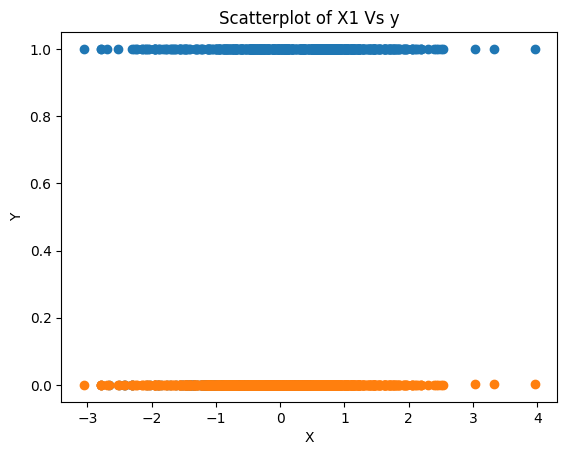

In [113]:
plt.title('Scatterplot of X1 Vs y')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], ypred_probs)
plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
m = LogisticRegression()

In [118]:
m.fit(X, y)

c:\Users\vitin\anaconda3\envs\torch_stuff\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [129]:
logistic_gradient_f(X, y, m.coef_.reshape(-1, 1))


array([[507250.73766158],
       [197586.19016394]])